In [2]:
%load_ext autoreload
%autoreload 2

import util as yu
from util import *
import util_moments as yum

yu.setpath('analysis_B20')

enss=['b','c','d']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


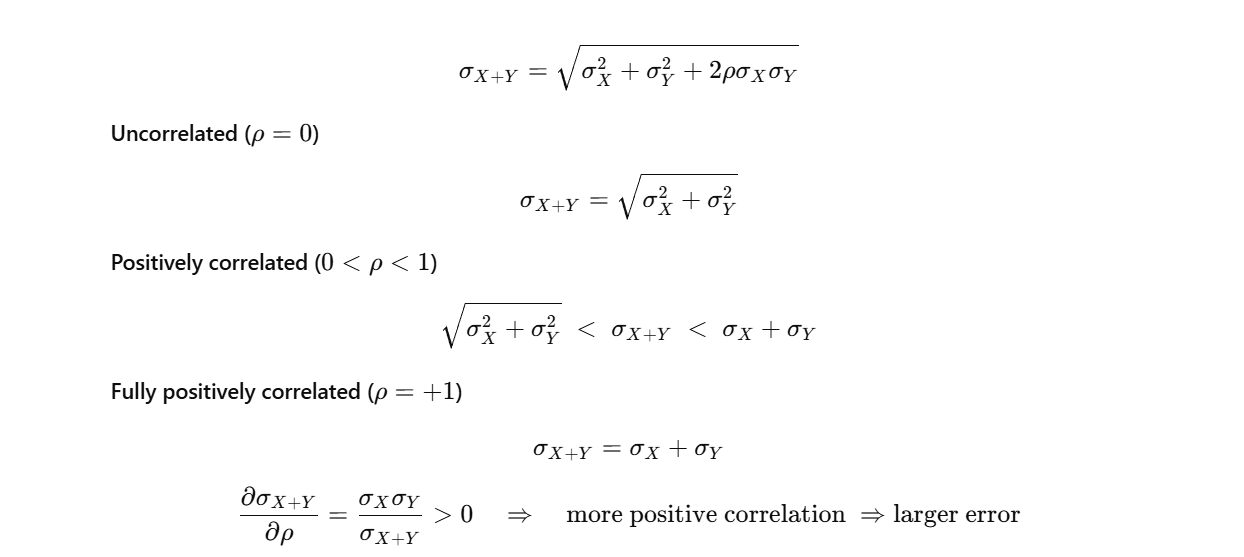

In [3]:
# RCs

key2bare_0Q2_conn=yu.load_pkl_reg('key2bare_0Q2_conn')
ens2Njk={ens:len(key2bare_0Q2_conn[(ens,'j+;conn')]) for ens in enss}

path='data_aux/RCs.pkl'
with open(path,'rb') as f:
    ens2RCs_me=pickle.load(f)
ens2RCs={ens:{} for ens in enss}
for ens in enss:
    for key in ens2RCs_me[ens]:
        if key.endswith('err'):
            continue
        ens2RCs[ens][key]=yu.jackknife_pseudo(ens2RCs_me[ens][key],ens2RCs_me[ens][f'{key}_err']*0+1e-10,ens2Njk[ens])[:,0]
        
path='/p/project1/ngff/li47/code/glwc2/project2/02_discNJN_1D/data_aux/RCs_pre.pkl'
with open(path,'rb') as f:
    ens2RCs_pre_me=pickle.load(f)
ens2RCs_pre={ens:{} for ens in enss[:1]}
for ens in enss[:1]:
    for key in ens2RCs_pre_me[ens]:
        if key.endswith('err'):
            continue
        ens2RCs_pre[ens][key]=yu.jackknife_pseudo(ens2RCs_pre_me[ens][key],ens2RCs_pre_me[ens][f'{key}_err']+1e-10,ens2Njk[ens])[:,0]

In [4]:
key2bare_conn=yu.load_pkl('pkl/analysis_avgx/reg_ignore/key2bare_conn.pkl')
selection2key2bare_disc=yu.load_pkl('pkl/analysis_avgx/reg_ignore/selection2key2bare_disc.pkl')
selection='const_MA'
key2bare={**key2bare_conn,**selection2key2bare_disc[selection]}
yum.extendBare_avgx(key2bare)
key2phy_A20=yum.bareRC2phy_avgx(key2bare,ens2RCs)

key2bare_0Q2_conn=yu.load_pkl_reg('key2bare_0Q2_conn')
key2bare_0Q2_disc=yu.load_pkl_reg('key2bare_0Q2_disc')
key2bare={**key2bare_0Q2_conn,**key2bare_0Q2_disc}
yum.extendBare_avgx(key2bare)
key2phy_B20=yum.bareRC2phy_avgx(key2bare,ens2RCs)

key2phy={}
for key in key2phy_B20.keys():
    key2phy[key]=(key2phy_A20[key]+key2phy_B20[key])/2

In [40]:
for ens in ['d']:
    print(yu.ens2label[ens])
    jss=[['ju'],['jd'],['js'],['jc']]
    dat=np.transpose([np.sum([key2phy[(ens,f'{j};stout10')] for j in js],axis=0) for js in jss])
    print(yu.jackme_un2str(dat,forceResult=True))
    print(yu.jackme_un2str(np.sum(dat,axis=1)))

    m,e,c=yu.jackmec(dat)
    rho=yu.cov2correlation(c)
    print(yu.formatMatrix(rho,'>8.4g'))
    print()

D96
[0.214(18), 0.026(15), 0.013(15), 0.003(13)]
0.256(57)
       1   0.8145   0.8444   0.8224
  0.8145        1   0.9305   0.9114
  0.8444   0.9305        1   0.9597
  0.8224   0.9114   0.9597        1



In [37]:
for ens in enss:
    print(yu.ens2label[ens])
    jss=[['ju'],['jd'],['js'],['jc']]
    dat=np.transpose([np.sum([key2phy[(ens,f'{j};stout10')] for j in js],axis=0) for js in jss])
    print(yu.jackme_un2str(dat,forceResult=True))
    print(yu.jackme_un2str(np.sum(dat,axis=1)))

    m,e,c=yu.jackmec(dat)
    rho=yu.cov2correlation(c)
    print(yu.formatMatrix(rho,'>8.4g'))
    print()

B64
[0.208(13), 0.0455(86), 0.0107(60), -0.0076(50)]
0.257(25)
       1   0.0593   0.4561    0.367
  0.0593        1   0.6431   0.5595
  0.4561   0.6431        1   0.8477
   0.367   0.5595   0.8477        1

C80
[0.206(13), 0.031(10), 0.0085(86), -0.0022(70)]
0.244(34)
       1   0.4859   0.5808   0.5539
  0.4859        1   0.7595   0.7142
  0.5808   0.7595        1   0.9461
  0.5539   0.7142   0.9461        1

D96
[0.214(18), 0.026(15), 0.013(15), 0.003(13)]
0.256(57)
       1   0.8145   0.8444   0.8224
  0.8145        1   0.9305   0.9114
  0.8444   0.9305        1   0.9597
  0.8224   0.9114   0.9597        1



In [38]:
for ens in enss:
    print(yu.ens2label[ens])
    jss=[['ju','jd'],['js'],['jc']]
    dat=np.transpose([np.sum([key2phy[(ens,f'{j};stout10')] for j in js],axis=0) for js in jss])
    print(yu.jackme_un2str(dat,forceResult=True))
    print(yu.jackme_un2str(np.sum(dat,axis=1)))

    m,e,c=yu.jackmec(dat)
    rho=yu.cov2correlation(c)
    print(yu.formatMatrix(rho,'>8.4g'))
    print()

B64
[0.254(16), 0.0107(60), -0.0076(50)]
0.257(25)
       1   0.7151   0.5979
  0.7151        1   0.8477
  0.5979   0.8477        1

C80
[0.238(21), 0.0085(86), -0.0022(70)]
0.244(34)
       1   0.7635   0.7229
  0.7635        1   0.9461
  0.7229   0.9461        1

D96
[0.240(31), 0.013(15), 0.003(13)]
0.256(57)
       1   0.9283   0.9066
  0.9283        1   0.9597
  0.9066   0.9597        1



In [31]:
key2bare_conn=yu.load_pkl('pkl/analysis_avgx/reg_ignore/key2bare_conn.pkl')
selection2key2bare_disc=yu.load_pkl('pkl/analysis_avgx/reg_ignore/selection2key2bare_disc.pkl')
selection='const_MA'
key2bare={**key2bare_conn,**selection2key2bare_disc[selection]}
yum.extendBare_avgx(key2bare)

for ens in enss:
    print(yu.ens2label[ens])
    jss=[['j+;conn'],['j+;disc'],['js;disc'],['jc;disc']]
    dat=np.transpose([np.sum([key2bare[(ens,f'{j}')] for j in js],axis=0) for js in jss])
    print(yu.jackme_un2str(dat,forceResult=True))
    print(yu.jackme_un2str(np.sum(dat,axis=1)))

    m,e,c=yu.jackmec(dat)
    rho=yu.cov2correlation(c)
    print(yu.formatMatrix(rho,'>12.4g'))
    print()

B64
[0.390(14), 0.088(15), 0.0303(73), 0.0018(56)]
0.511(31)
           1     0.006258      0.01591     -0.03716
    0.006258            1       0.9293       0.8406
     0.01591       0.9293            1       0.8812
    -0.03716       0.8406       0.8812            1

C80
[0.353(13), 0.087(25), 0.0249(100), 0.0013(80)]
0.467(43)
           1     -0.02706      -0.0433     -0.03187
    -0.02706            1        0.793       0.7533
     -0.0433        0.793            1       0.9575
    -0.03187       0.7533       0.9575            1

D96
[0.332(15), 0.104(33), 0.043(16), 0.019(15)]
0.498(65)
           1     -0.01479    -0.005647     -0.02166
    -0.01479            1        0.956        0.934
   -0.005647        0.956            1        0.965
    -0.02166        0.934        0.965            1



In [ ]:
key2bare_conn=yu.load_pkl('pkl/analysis_avgx/reg_ignore/key2bare_conn.pkl')
selection2key2bare_disc=yu.load_pkl('pkl/analysis_avgx/reg_ignore/selection2key2bare_disc.pkl')
selection='const_MA'
key2bare={**key2bare_conn,**selection2key2bare_disc[selection]}
yum.extendBare_avgx(key2bare)

for ens in enss:
    print(yu.ens2label[ens])
    jss=[['j+;conn','j+;disc'],['js;disc'],['jc;disc']]
    dat=np.transpose([np.sum([key2bare[(ens,f'{j}')] for j in js],axis=0) for js in jss])
    print(yu.jackme_un2str(dat,forceResult=True))
    print(yu.jackme_un2str(np.sum(dat,axis=1)))

    m,e,c=yu.jackmec(dat)
    rho=yu.cov2correlation(c)
    print(yu.formatMatrix(rho,'>12.4g'))
    print()

B64
[0.479(21), 0.0303(73), 0.0018(56)]
0.511(31)
           1        0.687       0.5863
       0.687            1       0.8812
      0.5863       0.8812            1

C80
[0.441(28), 0.0249(100), 0.0013(80)]
0.467(43)
           1        0.692       0.6617
       0.692            1       0.9575
      0.6617       0.9575            1

D96
[0.436(36), 0.043(16), 0.019(15)]
0.498(65)
           1        0.869       0.8422
       0.869            1        0.965
      0.8422        0.965            1

